In [1]:
from lxml import etree
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import extract as X
import parsing_xml as px

In [4]:
ag = etree.parse('../planetmath_defs.xml').getroot()

In [5]:
G = nx.DiGraph()
def_dict = {} #keys: dfndum Value: list of hashes of statements where the is appears
hash_dict = {} # keys: hashe of statements, Values: the text of the statement
for D in ag.iter(tag = 'stmnt'):
    hash_dict[hash(D.text)] = D.text
    
for d in ag.iter(tag = 'dfndum'):
    D = d.getparent().find('stmnt').text
    if d.text.strip() in def_dict:
        def_dict[d.text.strip()].append(hash(D))
    else:
        def_dict[d.text.strip()] = [hash(D),]
print('def_dict has this many elements ', len(def_dict.values()))

def_dict has this many elements  480


In [6]:
dgraph = nx.DiGraph()

In [7]:
empty_str_if_none = lambda s: s if s  else ''
for k,d_raw in enumerate(def_dict.keys()):
    d = d_raw.strip()
    if k%1000 == 0:
        print('doing k=', k)
    for Def in ag.iter(tag = 'definition'):
        D = Def.find('.//stmnt')
        #Check if D is not a definition for d
        if hash(D.text) in def_dict[d]:
            pass
        else:
            dfndum_lst = [c.text for c in D.getparent().findall('.//dfndum') ]
            if d in empty_str_if_none(D.text):
                add_edges_lst = [(d, p.strip()) for p in dfndum_lst if d != p]
                dgraph.add_edges_from(add_edges_lst)

doing k= 0


In [8]:
dgraph.nodes()

NodeView(('plastic constant', 'Perrin sequence', 'Padovan sequence', 'tacit multiplication operator', 'multiplication operator', 'Gaussian integer', 'Pythagorean triplet', 'Gaussian prime', 'Blum number', 'Euler numbers', 'Euler polynomial', 'irrational', 'Apéry’s constant', 'surd', 'square root', 'Farey sequence', 'Smarandache function', 'Stern-Brocot tree', 'addition', 'square root of 2', 'square root of 5', 'irrationality measure', 'square root of 3', 'continued fraction', 'prime constant', 'Liouville number', 'cyclotomic extension', 'number field', 'cyclotomic field', 'cyclotomic units', 'ray class field', 'sphenic number', 'Erdős-Woods number', 'prime signature', 'ray class group', 'regulator of an elliptic curve', 'fundamental units', 'abelian number field', 'adèle', 'biquadratic field', 'grössencharacter', 'ramification index', 'canonical height on an elliptic curve', 'unramified action', 'root-discriminant', 'Dedekind domain', 'Galois representation', 'discriminant', 'idèle', '

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


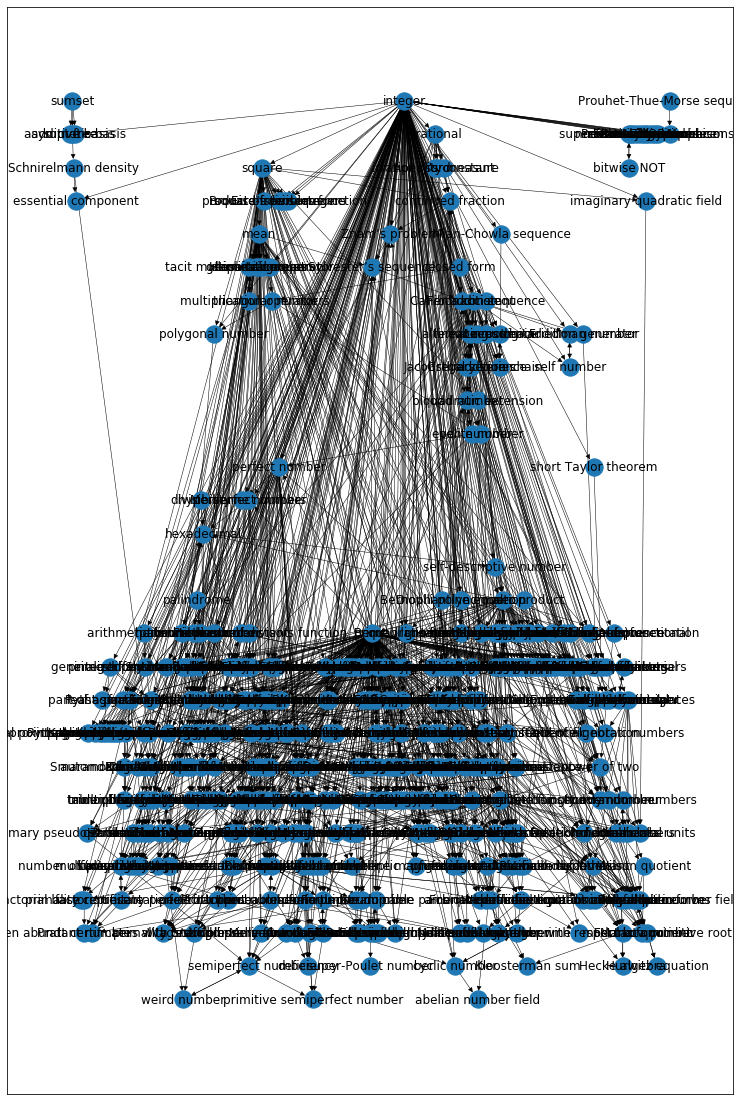

In [10]:
opts = {
    'node_size': 300,
    'width': 0.5,
    'with_labels': True,
}
plt.figure(1, figsize=(13,20))
pos = graphviz_layout(dgraph, prog='dot')
nx.draw_networkx(dgraph, pos, **opts)
plt.savefig('../starts_with_p_spectral.pdf')

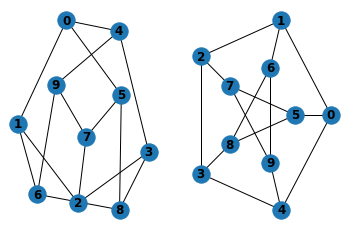

In [80]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [11]:
nx.find_cycle(dgraph)

[('plastic constant', 'Perrin sequence'),
 ('Perrin sequence', 'plastic constant')]